### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Importing the dataset

In [2]:
df=pd.read_csv("train.csv")
df.head(5)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


### Understanding the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [4]:
allcolumns=df.columns
for item in allcolumns:
    print(item," ",df[item].nunique())

ACTION   2
RESOURCE   7518
MGR_ID   4243
ROLE_ROLLUP_1   128
ROLE_ROLLUP_2   177
ROLE_DEPTNAME   449
ROLE_TITLE   343
ROLE_FAMILY_DESC   2358
ROLE_FAMILY   67
ROLE_CODE   343


In [5]:
df.corr()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


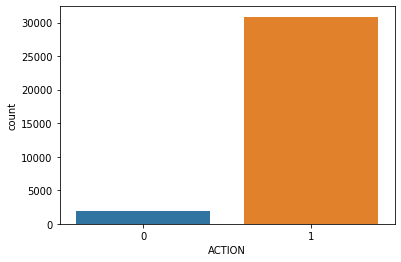

In [6]:
sns.countplot(df["ACTION"])

In [7]:
X=df.drop("ACTION",axis=1)
y=df["ACTION"]

### Performing train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=27)

### Feature Scaling:

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Classification models

##### Logistic Regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictedvalues=lr.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,lr_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, lr_predictedvalues))

Accuracy:  0.9445868424264616
Confusion matrix: 
 [[   0  454]
 [   0 7739]]


##### K-Neighbors Classifier

In [11]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2) 
knn.fit(X_train, y_train)
knn_predictedvalues=knn.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,knn_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, knn_predictedvalues))

Accuracy:  0.9400707921396314
Confusion matrix: 
 [[  33  421]
 [  70 7669]]


##### Decision Tree Classifier

In [12]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
dtc.fit(X_train, y_train)
dtc_predictedvalues=dtc.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,dtc_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, dtc_predictedvalues))

Accuracy:  0.9304284145001831
Confusion matrix: 
 [[ 191  263]
 [ 307 7432]]


##### Random Forest Classifier

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predictedvalues=rfc.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,rfc_predictedvalues))
print('Confusion matrix: \n',confusion_matrix(y_test, rfc_predictedvalues))

Accuracy:  0.9503234468448676
Confusion matrix: 
 [[ 177  277]
 [ 130 7609]]


Of all the models, Random Forest Classifier shows better accuracy.